In [315]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [7]:
df = pd.read_excel(r"C:\Users\NShapura\Downloads\Аналитик_РБК_тестовое задание.xlsx", sheet_name='Исходные данные')

In [11]:
df.head()

,Интервал дат визита,Визиты,Посетители,Просмотры
0,2015-01-01,73800,66742,141136
1,2015-01-02,94070,85086,179118
2,2015-01-03,95847,86782,184094
3,2015-01-04,83911,75901,160691
4,2015-01-05,105634,94929,206353


In [13]:
# Приведём столбец к типу данных datetime
df['Интервал дат визита'] = pd.to_datetime(df['Интервал дат визита']) 

### 1. Показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. Показатели: визиты, просмотры, среднедневное кол-во визитов на посетителя

In [36]:
# Отберём '01.09.2016' - '30.11.2016'
df2 = df[df['Интервал дат визита'].isin(pd.date_range('2016-09-01', '2016-11-30'))].reset_index(drop=True)

In [167]:
# Создадим новый столбец 'Визиты на посетителя'
df2['Визиты на посетителя'] = df2['Визиты'] / df2['Посетители']

In [169]:
# Сгруппируем понедельно с агрегацией на воскресенье
df2_agg = df2.groupby(pd.Grouper(key='Интервал дат визита', freq='W-SUN')).agg({'Визиты': 'sum', 
                                                                                  'Посетители': 'sum', 
                                                                                  'Визиты на посетителя': 'mean'})
df2_agg

,Визиты,Посетители,Визиты на посетителя
Интервал дат визита,,,
2016-09-04,501255,440508,1.129640
2016-09-11,702995,628002,1.112365
2016-09-18,550150,492660,1.111337
2016-09-25,551580,495837,1.108961
2016-10-02,745469,663834,1.117268
2016-10-09,716212,650821,1.099474
2016-10-16,735614,668019,1.097796
2016-10-23,614995,555999,1.101425
2016-10-30,1113021,1017786,1.089349


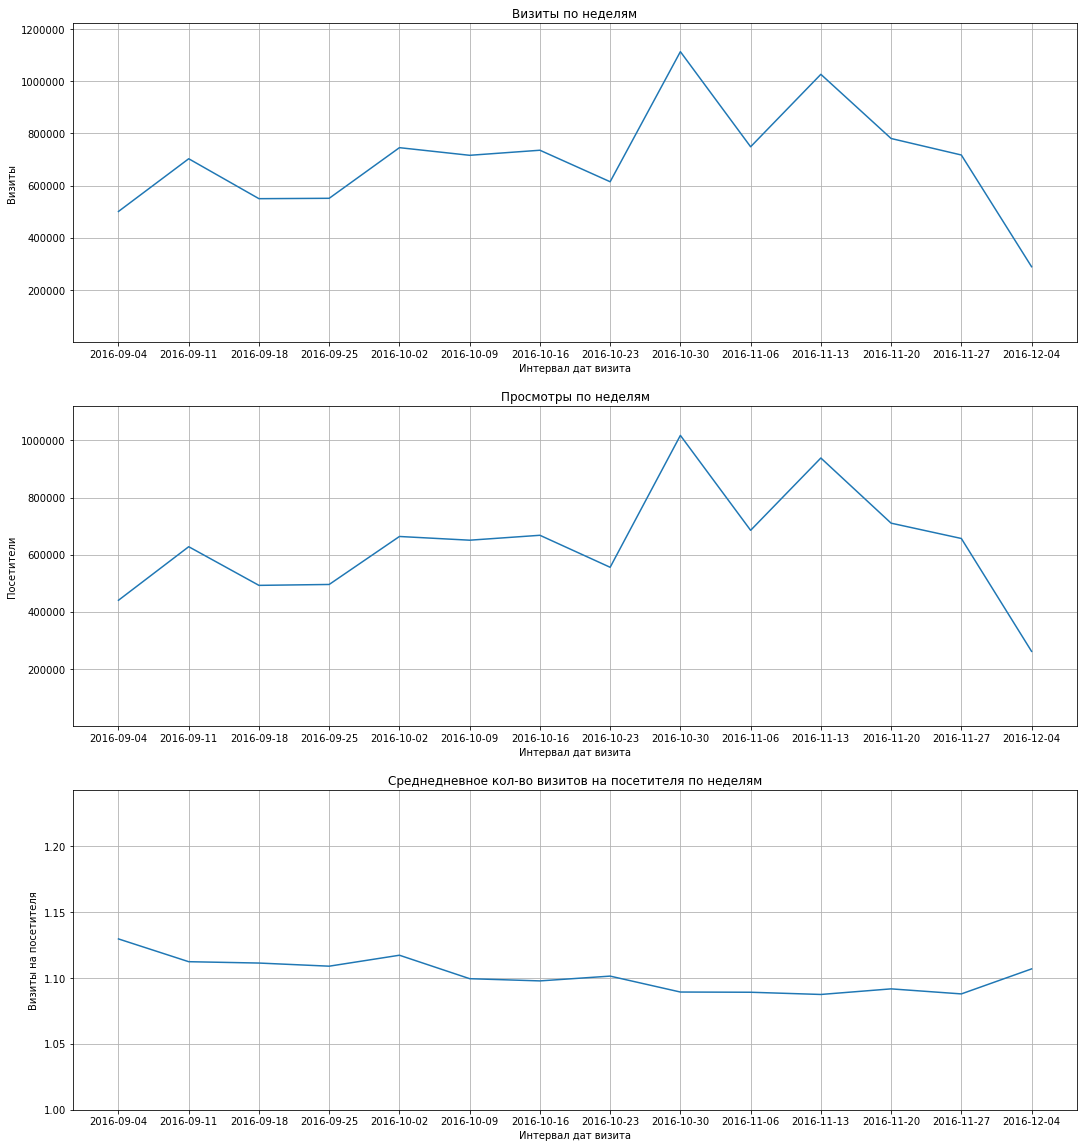

In [314]:
titles = ['Визиты по неделям', 'Просмотры по неделям', 'Cреднедневное кол-во визитов на посетителя по неделям']
plt.figure(figsize=(18, 20))

for i in range(3):
    plt.subplot(3, 1, i+1) 
    p = sns.lineplot(y = df2_agg.columns[i], x=df2_agg.index, data=df2_agg)
    p.set_ylim(1, df2_agg[df2_agg.columns[i]].max() * 1.1)
    p.set_xticks(df2_agg.index)
    p.grid()
    p.set_title(titles[i])
    if i != 2:
        p.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

### 2. Рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)

In [316]:
# Создадим две таблицы за 2015 и 2016 года
df_2015 = df[df['Интервал дат визита'].isin(pd.date_range('2015-01-01', '2015-12-31'))].reset_index(drop=True)
df_2016 = df[df['Интервал дат визита'].isin(pd.date_range('2016-01-01', '2016-12-31'))].reset_index(drop=True)

In [317]:
# Создадим новый столбец 'Визиты на посетителя'
df_2015['Визиты на посетителя'] = df_2015['Визиты'] / df_2015['Посетители']
df_2016['Визиты на посетителя'] = df_2016['Визиты'] / df_2016['Посетители']

In [318]:
# Сгруппируем понедельно с агрегацией на воскресенье
df_2015_agg = df_2015.groupby(pd.Grouper(key='Интервал дат визита', freq='W-SUN')).agg({'Визиты': 'sum', 
                                                'Посетители': 'sum', 'Визиты на посетителя': 'mean'}).reset_index(drop=True)
df_2016_agg = df_2016.groupby(pd.Grouper(key='Интервал дат визита', freq='W-SUN')).agg({'Визиты': 'sum', 
                                                'Посетители': 'sum', 'Визиты на посетителя': 'mean'}).reset_index(drop=True)

#### 2.1 Изменения по отношению к аналогичной неделе прошлого года

In [319]:
diff_y = pd.DataFrame()
diff_y['Визиты'] = df_2016_agg['Визиты'] - df_2015_agg['Визиты']
diff_y['Посетители'] = df_2016_agg['Посетители'] - df_2015_agg['Посетители']
diff_y['Визиты на посетителя'] = df_2016_agg['Визиты на посетителя'] - df_2015_agg['Визиты на посетителя']

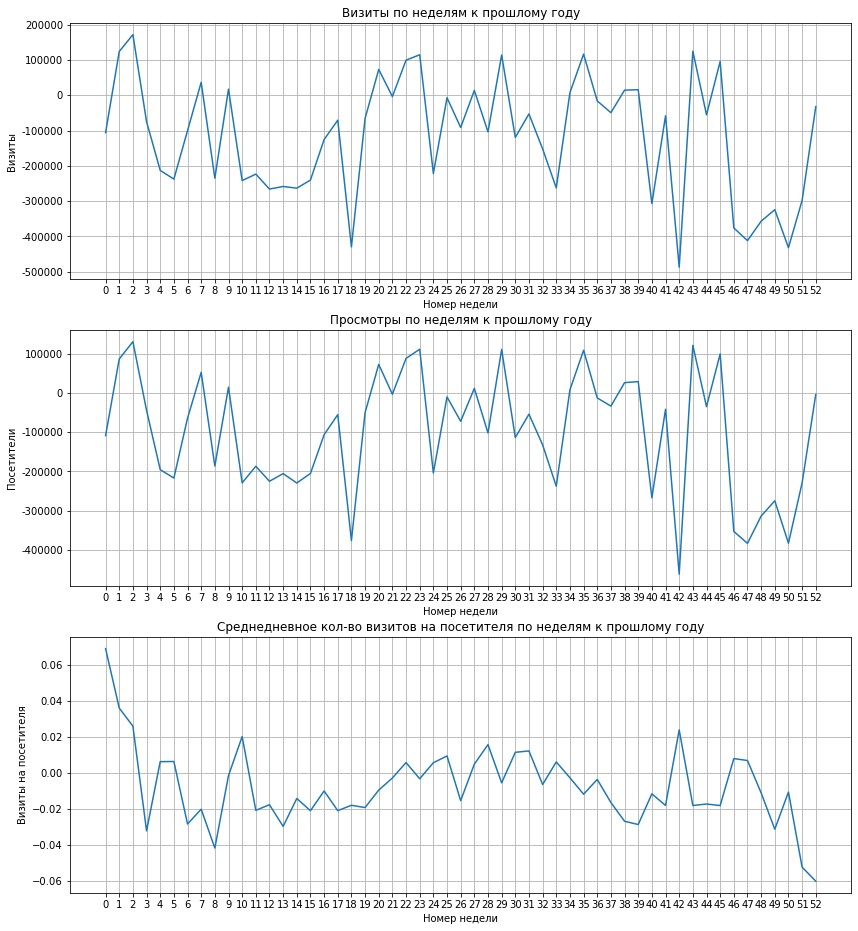

In [344]:
titles2 = ['Визиты по неделям к прошлому году', 'Просмотры по неделям к прошлому году', 
          'Cреднедневное кол-во визитов на посетителя по неделям к прошлому году']
plt.figure(figsize=(14, 16))

for i in range(3):
    plt.subplot(3, 1, i+1) 
    p = sns.lineplot(y = diff_y.columns[i], x=diff_y.index, data=diff_y)
    p.set_xticks(diff_y.index)
    p.set_xlabel('Номер недели')
    p.grid()
    p.set_title(titles2[i])
    if i != 2:
        p.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

#### 2.2 Изменения по отношению к предыдущей неделе текущего года

In [342]:
diff_w = df_2016_agg.rolling(window=2).apply(lambda x: x.iloc[1] - x.iloc[0])

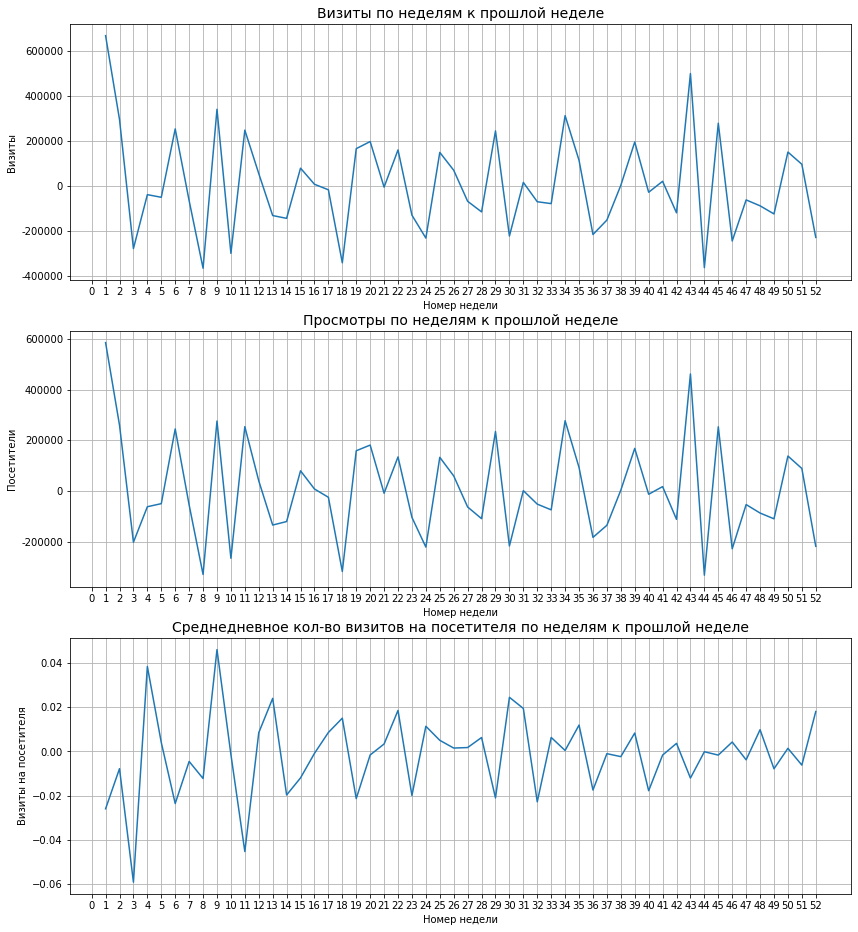

In [347]:
titles3 = ['Визиты по неделям к прошлой неделе', 'Просмотры по неделям к прошлой неделе', 
           'Cреднедневное кол-во визитов на посетителя по неделям к прошлой неделе']
plt.figure(figsize=(14, 16))

for i in range(3):
    plt.subplot(3, 1, i+1) 
    p = sns.lineplot(y = diff_w.columns[i], x=diff_w.index, data=diff_w)
    p.set_xticks(diff_w.index)
    p.set_xlabel('Номер недели')
    p.grid()
    p.set_title(titles3[i], fontsize=14)
    if i != 2:
        p.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.show()

### 3. Построить помесячный прогноз трафика проекта на 2017 год (по визитам)

In [259]:
# Сгруппируем данные по месяцу
df3 = df.groupby(pd.Grouper(key='Интервал дат визита', freq='m'))[['Визиты']].sum().reset_index(drop=True)

- Существует несколько различных способов сделать помесячный прогноз на следующий год, но располагая лишь скудной информацией точность будет невысока
- Предположим, что данные 2017 г. на столько же отличаются от 2016 г., как 2016 г. отличается от 2015 г.

In [273]:
df_2017 = df3[12:].reset_index(drop=True) - (df3[:12] - df3[12:].reset_index(drop=True))
df_2017.index = range(1, 13)

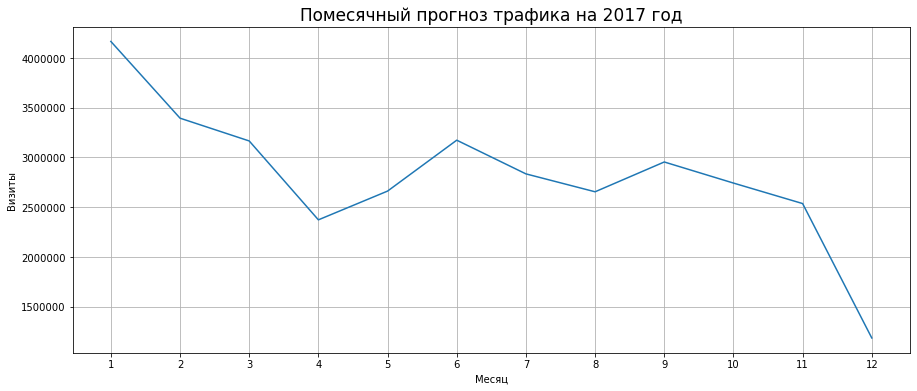

In [312]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot()
ax1.plot(df_2017.index, df_2017['Визиты'])
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Визиты')
ax1.set_title('Помесячный прогноз трафика на 2017 год', fontsize=17)
ax1.set_xticks(df_2017.index)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax1.grid()
plt.show()